In [0]:
# Use GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.13-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse -o nonempty drive

In [5]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive')
os.getcwd()

'/content/drive/My Drive'

In [7]:
#import library
import pandas as pd
import numpy as np
from glob import glob
import fnmatch
import cv2
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pylab as plt
import itertools
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
itertools
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, GlobalAveragePooling2D

Using TensorFlow backend.


In [0]:
X1=np.load('X_new.npy')
Y1=np.load('Y_new.npy')

In [0]:
X=X1[0:40000]
Y=Y1[0:40000]

In [10]:
def describe_data(x,y):
    print('Total number: {}'.format(len(x)))
    print('Number of IDC(-): {}'.format(np.sum(y==0)))
    print('Number of IDC(+): {}'.format(np.sum(y==1)))
    print('Percentage of IDC(+) : {:.2f}%'.format(100*np.mean(y)))
describe_data(X, Y)

Total number: 40000
Number of IDC(-): 30556
Number of IDC(+): 9444
Percentage of IDC(+) : 23.61%


In [0]:
x_sub = np.array(X)
x_sub=x_sub/255.0
x_sub_shape = x_sub.shape[1] * x_sub.shape[2] * x_sub.shape[3]
x_flat = x_sub.reshape(x_sub.shape[0], x_sub_shape)

In [12]:
r = pd.value_counts(Y)
print(r)
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(ratio='auto')
x_flat_resample,y_sub_resample=rus.fit_sample(x_flat,Y)
len(x_flat_resample)
r = pd.value_counts(y_sub_resample)
print(r)

0    30556
1     9444
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


1    9444
0    9444
dtype: int64


In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_flat_resample, y_sub_resample, test_size=0.2, random_state = 2) # 0.2 test_size means 20%

In [0]:
Y_train_c = to_categorical(y_train, num_classes = 2)
Y_test_c = to_categorical(y_test, num_classes = 2)

In [0]:
for i in range(len(X_train)):
    height, width, channels = 50,50,3
    X_train_reshape = X_train.reshape(len(X_train),height,width,channels)
for i in range(len(X_test)):
    height, width, channels = 50,50,3
    X_test_reshape = X_test.reshape(len(X_test),height,width,channels)

df = pd.DataFrame()
df["labels"]=y_train
label = df['labels']


In [16]:
r = pd.value_counts(y_train)
print(r)

0    7569
1    7541
dtype: int64


In [17]:
print(X_train_reshape.shape)
print(Y_train_c.shape)
print(X_test_reshape.shape)
print(Y_test_c.shape)

(15110, 50, 50, 3)
(15110, 2)
(3778, 50, 50, 3)
(3778, 2)


In [18]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(50, 50, 3), padding = 'Same', strides = 2, ))
model.add(Conv2D(32,(3,3), padding = 'Same', activation='relu' ))
model.add(Conv2D(32,(3,3), padding = 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))   
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
datagen = ImageDataGenerator(
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True) 

In [0]:
class MetricsCheckpoint(Callback):
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plot_cm(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def plot_lc(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

In [21]:
history = model.fit_generator(datagen.flow(X_train_reshape,Y_train_c, batch_size=32),validation_data=(X_test_reshape,Y_test_c),
                        steps_per_epoch=len(X_train_reshape) / 32, epochs=100 ,callbacks = [MetricsCheckpoint('logs')],verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





473/472 [==============================] - 22s 47ms/step - loss: 0.6247 - acc: 0.6507 - val_loss: 0.5975 - val_acc: 0.6699
Epoch 2/100
473/472 [==============================] - 16s 33ms/step - loss: 0.5225 - acc: 0.7519 - val_loss: 0.4602 - val_acc: 0.7935
Epoch 3/100
473/472 [==============================] - 16s 33ms/step - loss: 0.4874 - acc: 0.7790 - val_loss: 0.4305 - val_acc: 0.8081
Epoch 4/100
473/472 [==============================] - 16s 33ms/step - loss: 0.4701 - acc: 0.7950 - val_loss: 0.4259 - val_acc: 0.8123
Epoch 5/100
473/472 [==============================] - 15s 33ms/step - loss: 0.4517 - acc: 0.8004 - val_loss: 0.4326 - val_acc: 0.8097
Epoch 6/100
473/472 [==============================] - 17s 35ms/step - loss: 0.4443 - acc: 0.8060 - val_loss: 0.4451 - val_acc: 0.8023
Epoch 7/100
473/472 [==============================] - 15s 33ms/step - loss: 0.4317 - ac

In [22]:
score = model.evaluate(X_test_reshape,Y_test_c)
print(score)

3778/3778 [==============================] - 0s 130us/step
[0.3092877008237808, 0.8644785600847009]


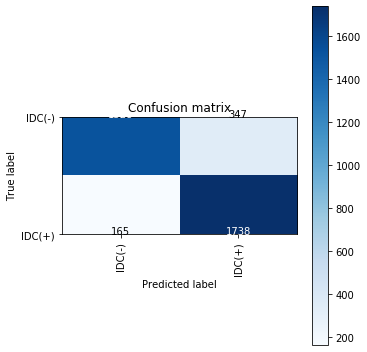

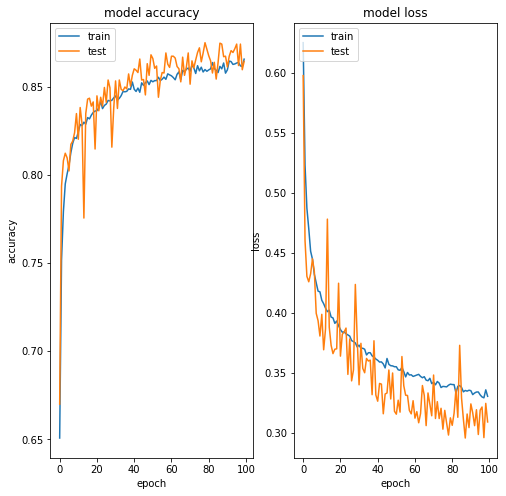

In [25]:
y_pred = model.predict(X_test_reshape)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(Y_test_c,axis=1)
dict_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_cm(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()
plot_lc(history)
plt.show()


In [26]:
print(confusion_matrix(Y_true, Y_pred_classes))

from sklearn import metrics
print(metrics.classification_report(Y_true, Y_pred_classes))


[[1528  347]
 [ 165 1738]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.86      1875
           1       0.83      0.91      0.87      1903

    accuracy                           0.86      3778
   macro avg       0.87      0.86      0.86      3778
weighted avg       0.87      0.86      0.86      3778



In [27]:
cm= confusion_matrix(Y_true, Y_pred_classes)
sensitivity= cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )
secificity= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ',secificity)

Sensitivity :  0.9132947976878613
Specificity :  0.8149333333333333
